In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels

#### 对数据进行arima模型分析，其中包括平稳性分析（单根分析）、季节性分析、自相关和偏自相关分析、模型预测

In [2]:
dataset = pd.read_csv('ShanghaiStockIndex.csv', encoding='gbk')

In [3]:
dataset.head()

,日期,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,成交量,成交金额
0,2019-10-23,'000001,上证指数,2941.6188,2957.2995,2934.6274,2952.9693,2954.3799,-12.7611,-0.4319,123812881,1.39653650476e+11
1,2019-10-22,'000001,上证指数,2954.3799,2954.6415,2934.3873,2945.6001,2939.6179,14.762,0.5022,117482048,1.30381741175e+11
2,2019-10-21,'000001,上证指数,2939.6179,2940.3246,2917.6884,2933.8969,2938.1413,1.4766,0.0503,132475107,1.4568588122e+11
3,2019-10-18,'000001,上证指数,2938.1413,2987.2035,2933.2424,2982.3417,2977.3342,-39.1929,-1.3164,149990678,1.62018272294e+11
4,2019-10-17,'000001,上证指数,2977.3342,2986.7191,2969.5680,2979.9929,2978.7124,-1.3782,-0.0463,122527614,1.36051252104e+11


In [4]:
dataset.set_index(keys=['日期'], drop=True, inplace=True)

In [5]:
dataset.head()

,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,成交量,成交金额
日期,,,,,,,,,,,
2019-10-23,'000001,上证指数,2941.6188,2957.2995,2934.6274,2952.9693,2954.3799,-12.7611,-0.4319,123812881,1.39653650476e+11
2019-10-22,'000001,上证指数,2954.3799,2954.6415,2934.3873,2945.6001,2939.6179,14.762,0.5022,117482048,1.30381741175e+11
2019-10-21,'000001,上证指数,2939.6179,2940.3246,2917.6884,2933.8969,2938.1413,1.4766,0.0503,132475107,1.4568588122e+11
2019-10-18,'000001,上证指数,2938.1413,2987.2035,2933.2424,2982.3417,2977.3342,-39.1929,-1.3164,149990678,1.62018272294e+11
2019-10-17,'000001,上证指数,2977.3342,2986.7191,2969.5680,2979.9929,2978.7124,-1.3782,-0.0463,122527614,1.36051252104e+11


In [6]:
dataset_closePrice = dataset['收盘价']

In [7]:
dataset_closePrice.rename('ClosePrice', inplace=True)

日期
2019-10-23    2941.6188
2019-10-22    2954.3799
2019-10-21    2939.6179
2019-10-18    2938.1413
2019-10-17    2977.3342
2019-10-16    2978.7124
2019-10-15    2991.0459
2019-10-14    3007.8834
2019-10-11    2973.6558
2019-10-10    2947.7106
2019-10-09    2924.8566
2019-10-08    2913.5704
2019-09-30    2905.1892
2019-09-27    2932.1670
2019-09-26    2929.0875
2019-09-25    2955.4325
2019-09-24    2985.3406
2019-09-23    2977.0767
2019-09-20    3006.4467
2019-09-19    2999.2789
2019-09-18    2985.6586
2019-09-17    2978.1178
2019-09-16    3030.7544
2019-09-12    3031.2351
2019-09-11    3008.8118
2019-09-10    3021.2024
2019-09-09    3024.7388
2019-09-06    2999.6013
2019-09-05    2985.8648
2019-09-04    2957.4116
                ...    
1991-01-30     130.4400
1991-01-29     130.9500
1991-01-28     131.4600
1991-01-25     132.0500
1991-01-24     132.6100
1991-01-23     133.1700
1991-01-22     133.7200
1991-01-21     134.2400
1991-01-18     134.2400
1991-01-17     134.2500
1991-01-16   

In [8]:
dataset.index.rename('Date', inplace=True)

In [9]:
dataset_closePrice.index.rename('Date', inplace=True)

In [10]:
type(dataset_closePrice.index)

pandas.core.indexes.base.Index

In [11]:
dataset_closePrice = dataset_closePrice.iloc[::-1]

In [12]:
dataset_closePrice

Date
1990-12-19      99.9800
1990-12-20     104.3900
1990-12-21     109.1300
1990-12-24     114.5500
1990-12-25     120.2500
1990-12-26     125.2700
1990-12-27     125.2800
1990-12-28     126.4500
1990-12-31     127.6100
1991-01-02     128.8400
1991-01-03     130.1400
1991-01-04     131.4400
1991-01-07     132.0600
1991-01-08     132.6800
1991-01-09     133.3400
1991-01-10     133.9700
1991-01-11     134.6000
1991-01-14     134.6700
1991-01-15     134.7400
1991-01-16     134.2400
1991-01-17     134.2500
1991-01-18     134.2400
1991-01-21     134.2400
1991-01-22     133.7200
1991-01-23     133.1700
1991-01-24     132.6100
1991-01-25     132.0500
1991-01-28     131.4600
1991-01-29     130.9500
1991-01-30     130.4400
                ...    
2019-09-04    2957.4116
2019-09-05    2985.8648
2019-09-06    2999.6013
2019-09-09    3024.7388
2019-09-10    3021.2024
2019-09-11    3008.8118
2019-09-12    3031.2351
2019-09-16    3030.7544
2019-09-17    2978.1178
2019-09-18    2985.6586
2019-09-19 

In [13]:
dataset_closePrice = dataset_closePrice.reindex([pd.Timestamp(i) for i in dataset_closePrice.index])

In [14]:
dataset_closePrice.head()

Date
1990-12-19     99.98
1990-12-20    104.39
1990-12-21    109.13
1990-12-24    114.55
1990-12-25    120.25
Name: ClosePrice, dtype: float64

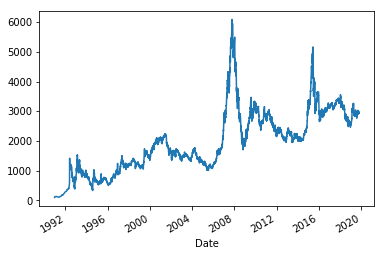

In [15]:
# 画图，总体趋势
dataset_closePrice.plot()

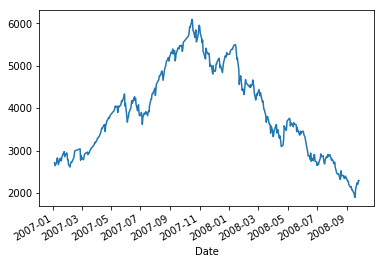

In [16]:
# 画图，最高点趋势
dataset_closePrice['2007-01-01':'2008-10-1'].plot()

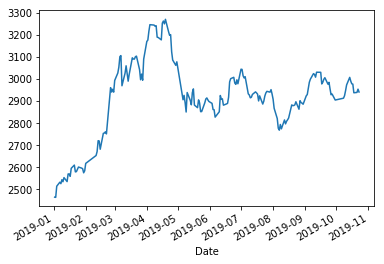

In [17]:
#画图，今年趋势
dataset_closePrice['2019'].plot()

#### 1、判断稳定性，利用单根检测，判断稳定性

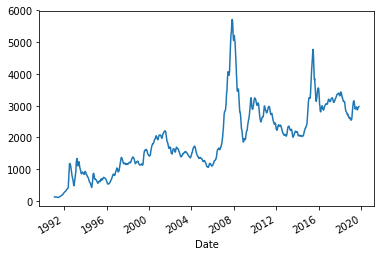

In [18]:
# 画图，一个月滑动平均
dataset_closePrice.rolling(window=30).mean().plot()

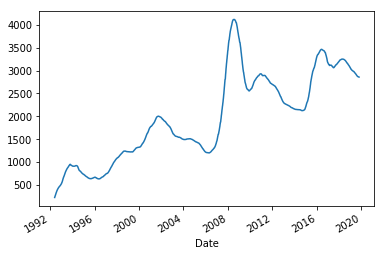

In [19]:
# 画图，一年滑动平均
dataset_closePrice.rolling(window=365).mean().plot()

In [20]:
# 单根检验
from statsmodels.tsa.stattools import adfuller

In [21]:
adfuller(dataset_closePrice, autolag='AIC', regression='ct')

(-3.2194052808704265,
 0.08060384602665477,
 35,
 7015,
 {'1%': -3.9600611126422205,
  '10%': -3.127418661435511,
  '5%': -3.411116042625656},
 71918.63675864156)

In [22]:
# P值大于0.05，且值大于5%阈值，说明存在单根，不是平稳数据
# 问题一：单根检验的各个参数的选取

#### 2、利用差分使得数据平稳

In [23]:
dataset_closePrice_1 = dataset_closePrice.diff(1).dropna()

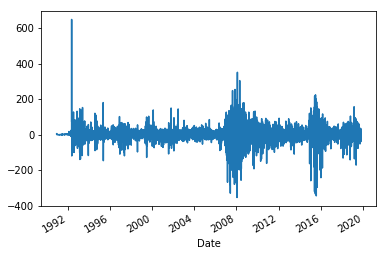

In [24]:
dataset_closePrice_1.plot()

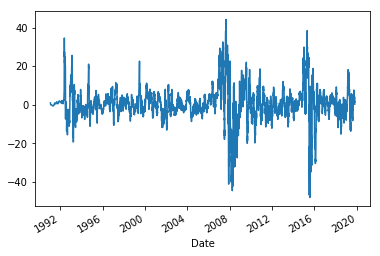

In [25]:
dataset_closePrice_1.rolling(window=30).mean().plot()

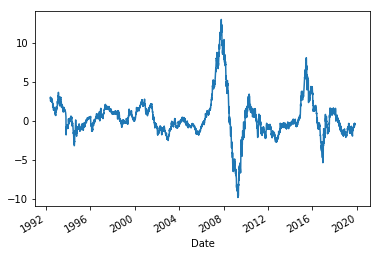

In [26]:
dataset_closePrice_1.rolling(window=365).mean().plot()

In [27]:
adfuller(dataset_closePrice_1, autolag='AIC', regression='ct')

(-13.527421566199004,
 3.233916912088588e-21,
 34,
 7015,
 {'1%': -3.9600611126422205,
  '10%': -3.127418661435511,
  '5%': -3.411116042625656},
 71917.80719547742)

In [28]:
# P值远远小于0.05，不接受有单根的假设，数据平稳

#### 3、季节性分析
##### 股票指数原理上不应该与季节性有关，查看季节性

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [30]:
dataset_closePrice_decompose = seasonal_decompose(dataset_closePrice, freq=30)

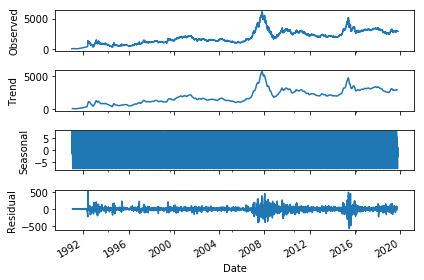

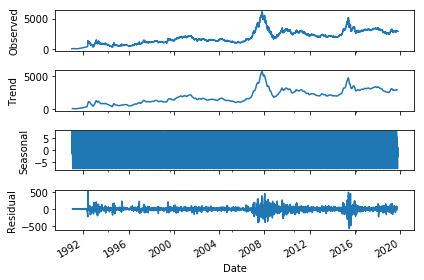

In [31]:
dataset_closePrice_decompose.plot()

#### 4、对数分析

In [32]:
dataset_closePrice_log = dataset_closePrice.apply(lambda x: np.log(x))

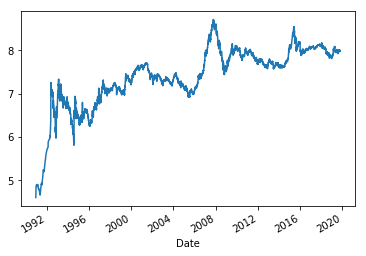

In [33]:
dataset_closePrice_log.plot()

In [34]:
adfuller(dataset_closePrice_log)

(-3.4305768181302434,
 0.009959639017176536,
 28,
 7022,
 {'1%': -3.4312815995582424,
  '10%': -2.5669891398502536,
  '5%': -2.861951692363166},
 -33228.37110289316)

In [35]:
adfuller(dataset_closePrice_log, autolag='AIC', regression='ct')

(-3.9104893771623446,
 0.0117359136667009,
 28,
 7022,
 {'1%': -3.9600598249985732,
  '10%': -3.127418293849536,
  '5%': -3.4111154183613044},
 -33232.17364720492)

In [36]:
dataset_closePrice_log_1 = dataset_closePrice_log.diff(1).dropna()

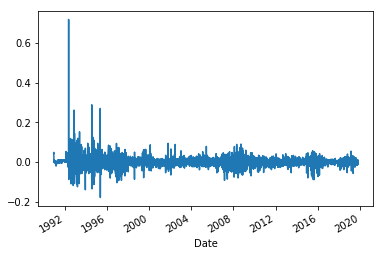

In [37]:
dataset_closePrice_log_1.plot()

In [38]:
adfuller(dataset_closePrice_log_1)

(-15.264787895208375,
 4.805974203183718e-28,
 27,
 7022,
 {'1%': -3.4312815995582424,
  '10%': -2.5669891398502536,
  '5%': -2.861951692363166},
 -33212.593902598746)

#### 5、Arima模型估计

In [39]:
# 首先确定p值和q值
from statsmodels.tsa.stattools import acf, pacf

In [40]:
dataset_acf, dataset_confint= acf(dataset_closePrice_log_1, nlags=20, alpha=0.05)

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

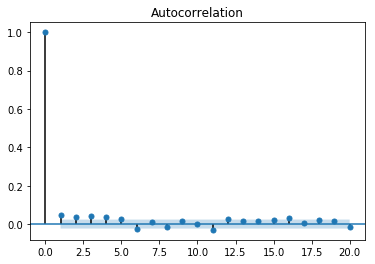

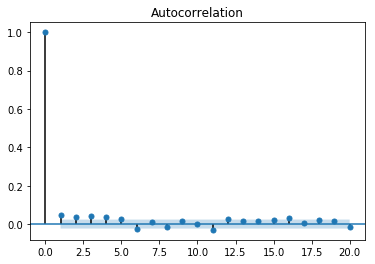

In [42]:
plot_acf(dataset_closePrice_log_1, lags=20)

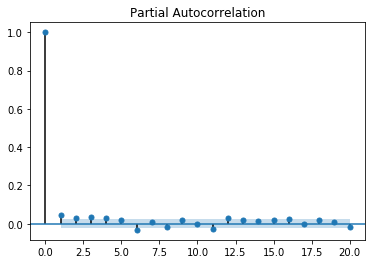

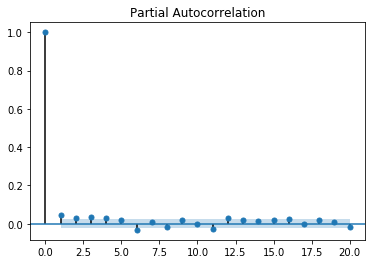

In [43]:
plot_pacf(dataset_closePrice_log_1, lags=20)

##### p值的选定为当pacf图迟延进入95%的置信区间，acf值近乎于0；q值选定为当acf图迟延进入95%的置信区间，pacf图近乎于0
##### 所以选定p值为1，q值为4

In [44]:
from statsmodels.tsa import arima_model

In [64]:
model = arima_model.ARIMA(dataset_closePrice_log, order=(1, 2, 4))

/home/r2learn/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/r2learn/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [65]:
dataset_predict = model.fit(disp=True)

/home/r2learn/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [82]:
import datetime, time

In [84]:
a = time.strftime('1990-12-21')

In [87]:
type(a)

str

In [88]:
a = datetime.datetime.strptime('1990-12-21', '%Y-%m-%d')

In [90]:
type(a)

datetime.datetime

In [80]:
b = datetime.datetime.strptime('2019-10-21', '%Y-%m-%d')

In [94]:
model.predict(dataset_predict.params, start=2, end=7050)

array([-8.48700975e-07, -6.13270163e-04, -3.07086720e-03, ...,
        1.28160356e-02, -8.12963679e-04, -4.92842258e-03])

In [70]:
dataset_predict.fittedvalues

Date
1990-12-21   -8.487010e-07
1990-12-24   -6.132702e-04
1990-12-25   -3.070867e-03
1990-12-26   -2.270103e-03
1990-12-27    4.119977e-03
1990-12-28    3.602594e-02
1990-12-31    2.244986e-02
1991-01-02    1.930526e-02
1991-01-03    1.752014e-02
1991-01-04    1.495329e-02
1991-01-07    1.397184e-02
1991-01-08    1.722055e-02
1991-01-09    1.591082e-02
1991-01-10    1.432230e-02
1991-01-11    1.370008e-02
1991-01-14    1.275870e-02
1991-01-15    1.578896e-02
1991-01-16    1.475748e-02
1991-01-17    1.773110e-02
1991-01-18    1.329466e-02
1991-01-21    1.272481e-02
1991-01-22    1.218039e-02
1991-01-23    1.506426e-02
1991-01-24    1.458197e-02
1991-01-25    1.390173e-02
1991-01-28    1.340054e-02
1991-01-29    1.302182e-02
1991-01-30    1.197489e-02
1991-01-31    1.150244e-02
1991-02-01    1.081717e-02
                  ...     
2019-09-04   -1.703353e-03
2019-09-05   -8.118840e-03
2019-09-06   -8.670399e-03
2019-09-09   -3.241694e-03
2019-09-10   -7.137320e-03
2019-09-11    2.176171e

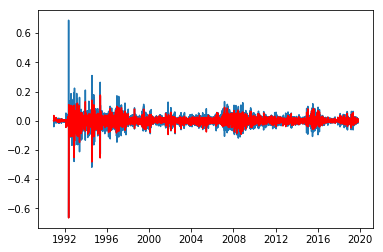

In [48]:
import matplotlib.pyplot as plt
plt.plot(dataset_closePrice_log_1.diff(1).dropna())
plt.plot(dataset_predict.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-log_air_passengers_diff)**2))

In [49]:
predict_diff_2 = pd.Series(dataset_predict.fittedvalues, copy=True)

In [50]:
predict_cumsum_1 = predict_diff_2.cumsum()

In [59]:
predict_cumsum_1

Date
1990-12-21   -8.487010e-07
1990-12-24   -6.141189e-04
1990-12-25   -3.684986e-03
1990-12-26   -5.955089e-03
1990-12-27   -1.835112e-03
1990-12-28    3.419083e-02
1990-12-31    5.664069e-02
1991-01-02    7.594594e-02
1991-01-03    9.346609e-02
1991-01-04    1.084194e-01
1991-01-07    1.223912e-01
1991-01-08    1.396118e-01
1991-01-09    1.555226e-01
1991-01-10    1.698449e-01
1991-01-11    1.835450e-01
1991-01-14    1.963037e-01
1991-01-15    2.120926e-01
1991-01-16    2.268501e-01
1991-01-17    2.445812e-01
1991-01-18    2.578759e-01
1991-01-21    2.706007e-01
1991-01-22    2.827811e-01
1991-01-23    2.978453e-01
1991-01-24    3.124273e-01
1991-01-25    3.263290e-01
1991-01-28    3.397296e-01
1991-01-29    3.527514e-01
1991-01-30    3.647263e-01
1991-01-31    3.762287e-01
1991-02-01    3.870459e-01
                  ...     
2019-09-04    3.973279e-01
2019-09-05    3.892090e-01
2019-09-06    3.805386e-01
2019-09-09    3.772969e-01
2019-09-10    3.701596e-01
2019-09-11    3.723358e

In [51]:
dataset_closePrice_log_1 = dataset_closePrice_log.diff(1).dropna()

In [60]:
dataset_closePrice_log_1

Date
1990-12-20    0.043164
1990-12-21    0.044406
1990-12-24    0.048472
1990-12-25    0.048562
1990-12-26    0.040898
1990-12-27    0.000080
1990-12-28    0.009296
1990-12-31    0.009132
1991-01-02    0.009593
1991-01-03    0.010039
1991-01-04    0.009940
1991-01-07    0.004706
1991-01-08    0.004684
1991-01-09    0.004962
1991-01-10    0.004714
1991-01-11    0.004692
1991-01-14    0.000520
1991-01-15    0.000520
1991-01-16   -0.003718
1991-01-17    0.000074
1991-01-18   -0.000074
1991-01-21    0.000000
1991-01-22   -0.003881
1991-01-23   -0.004122
1991-01-24   -0.004214
1991-01-25   -0.004232
1991-01-28   -0.004478
1991-01-29   -0.003887
1991-01-30   -0.003902
1991-01-31   -0.003610
                ...   
2019-09-04    0.009260
2019-09-05    0.009575
2019-09-06    0.004590
2019-09-09    0.008345
2019-09-10   -0.001170
2019-09-11   -0.004110
2019-09-12    0.007425
2019-09-16   -0.000159
2019-09-17   -0.017520
2019-09-18    0.002529
2019-09-19    0.004552
2019-09-20    0.002387
2019-0

In [52]:
dataset_closePrice_1_A = pd.Series(dataset_closePrice_log_1.iloc[0], index=dataset_closePrice_log_1.index)

In [61]:
dataset_closePrice_1_A

Date
1990-12-20    0.043164
1990-12-21    0.043164
1990-12-24    0.043164
1990-12-25    0.043164
1990-12-26    0.043164
1990-12-27    0.043164
1990-12-28    0.043164
1990-12-31    0.043164
1991-01-02    0.043164
1991-01-03    0.043164
1991-01-04    0.043164
1991-01-07    0.043164
1991-01-08    0.043164
1991-01-09    0.043164
1991-01-10    0.043164
1991-01-11    0.043164
1991-01-14    0.043164
1991-01-15    0.043164
1991-01-16    0.043164
1991-01-17    0.043164
1991-01-18    0.043164
1991-01-21    0.043164
1991-01-22    0.043164
1991-01-23    0.043164
1991-01-24    0.043164
1991-01-25    0.043164
1991-01-28    0.043164
1991-01-29    0.043164
1991-01-30    0.043164
1991-01-31    0.043164
                ...   
2019-09-04    0.043164
2019-09-05    0.043164
2019-09-06    0.043164
2019-09-09    0.043164
2019-09-10    0.043164
2019-09-11    0.043164
2019-09-12    0.043164
2019-09-16    0.043164
2019-09-17    0.043164
2019-09-18    0.043164
2019-09-19    0.043164
2019-09-20    0.043164
2019-0

In [53]:
dataset_closePrice_A = dataset_closePrice_1_A.add(predict_cumsum_1, fill_value=0)

In [62]:
dataset_closePrice_A

Date
1990-12-20    0.043164
1990-12-21    0.043163
1990-12-24    0.042550
1990-12-25    0.039479
1990-12-26    0.037209
1990-12-27    0.041329
1990-12-28    0.077355
1990-12-31    0.099804
1991-01-02    0.119110
1991-01-03    0.136630
1991-01-04    0.151583
1991-01-07    0.165555
1991-01-08    0.182775
1991-01-09    0.198686
1991-01-10    0.213009
1991-01-11    0.226709
1991-01-14    0.239467
1991-01-15    0.255256
1991-01-16    0.270014
1991-01-17    0.287745
1991-01-18    0.301040
1991-01-21    0.313764
1991-01-22    0.325945
1991-01-23    0.341009
1991-01-24    0.355591
1991-01-25    0.369493
1991-01-28    0.382893
1991-01-29    0.395915
1991-01-30    0.407890
1991-01-31    0.419392
                ...   
2019-09-04    0.440492
2019-09-05    0.432373
2019-09-06    0.423702
2019-09-09    0.420461
2019-09-10    0.413323
2019-09-11    0.415500
2019-09-12    0.420199
2019-09-16    0.413691
2019-09-17    0.414783
2019-09-18    0.432220
2019-09-19    0.429737
2019-09-20    0.425669
2019-0

In [54]:
dataset_A = dataset_closePrice_A.cumsum()

In [63]:
dataset_A

Date
1990-12-20       0.043164
1990-12-21       0.086327
1990-12-24       0.128876
1990-12-25       0.168355
1990-12-26       0.205564
1990-12-27       0.246892
1990-12-28       0.324247
1990-12-31       0.424051
1991-01-02       0.543161
1991-01-03       0.679791
1991-01-04       0.831374
1991-01-07       0.996929
1991-01-08       1.179704
1991-01-09       1.378390
1991-01-10       1.591399
1991-01-11       1.818108
1991-01-14       2.057575
1991-01-15       2.312831
1991-01-16       2.582845
1991-01-17       2.870590
1991-01-18       3.171630
1991-01-21       3.485394
1991-01-22       3.811339
1991-01-23       4.152348
1991-01-24       4.507939
1991-01-25       4.877432
1991-01-28       5.260325
1991-01-29       5.656240
1991-01-30       6.064130
1991-01-31       6.483523
                 ...     
2019-09-04    3836.809567
2019-09-05    3837.241939
2019-09-06    3837.665642
2019-09-09    3838.086102
2019-09-10    3838.499426
2019-09-11    3838.914925
2019-09-12    3839.335124
2019-09

In [55]:
dataset_B_1 = pd.Series(dataset_closePrice_log.iloc[0], index=dataset_closePrice_log.index)

In [56]:
dataset_B = dataset_B_1.add(dataset_A, fill_value=0)

In [57]:
dataset_predict = np.exp(dataset_B).copy()

/home/r2learn/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:2492: RuntimeWarning: overflow encountered in double_scalars
  x1t += delta


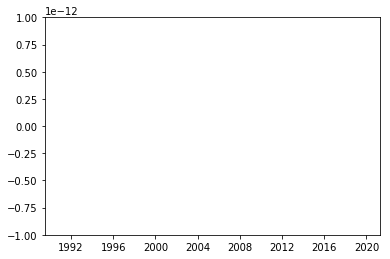

In [58]:
plt.plot(dataset_closePrice)
plt.plot(dataset_predict)

In [277]:
# 从图中可以看出，效果并不太理想

In [278]:
#把p值设为4，q值也为4

In [304]:
model = arima_model.ARIMA(dataset_closePrice_log, order=(4, 1, 4))

/home/r2learn/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/r2learn/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [305]:
dataset_predict_A = model.fit(disp=True)

In [306]:
dataset_predict_A = pd.Series(dataset_predict_A.fittedvalues, copy=True)

In [307]:
dataset_predict_A_cumsum = dataset_predict_A.cumsum()

In [308]:
dataset_predict_B = pd.Series(dataset_closePrice_log.iloc[0], index=dataset_closePrice_log.index)

In [309]:
data_predict = dataset_predict_B.add(dataset_predict_A_cumsum, fill_value=0)

In [310]:
data_predict = np.exp(data_predict).copy()

In [311]:
data_predict

Date
1990-12-19      99.980000
1990-12-20     100.028281
1990-12-21     100.291113
1990-12-24     100.680517
1990-12-25     101.249529
1990-12-26     101.903902
1990-12-27     102.580213
1990-12-28     103.034857
1990-12-31     103.423739
1991-01-02     103.701232
1991-01-03     103.986626
1991-01-04     104.250402
1991-01-07     104.523296
1991-01-08     104.718936
1991-01-09     104.885061
1991-01-10     105.022452
1991-01-11     105.182806
1991-01-14     105.338580
1991-01-15     105.462791
1991-01-16     105.541244
1991-01-17     105.581821
1991-01-18     105.635742
1991-01-21     105.698478
1991-01-22     105.759568
1991-01-23     105.780251
1991-01-24     105.779838
1991-01-25     105.770314
1991-01-28     105.770352
1991-01-29     105.765035
1991-01-30     105.749333
                 ...     
2019-09-04    2958.416630
2019-09-05    2964.655654
2019-09-06    2967.752990
2019-09-09    2969.667631
2019-09-10    2972.764940
2019-09-11    2977.824045
2019-09-12    2982.037862
2019-09

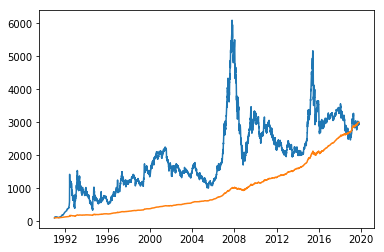

In [314]:
plt.plot(dataset_closePrice)
plt.plot(data_predict)